In [1]:
# Step 1: Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense

In [2]:
# Load the dataset
data = pd.read_csv('Soil_Seeds_DataSet.csv')
print(data)

      Seed_ID        timestamp  Soil humidity 1  Irrigation field 1  \
0           1   2/23/2019 0:00            67.92                   0   
1           2   2/23/2019 0:05            67.89                   0   
2           3   2/23/2019 0:10            67.86                   0   
3           4   2/23/2019 0:15            67.84                   0   
4           5   2/23/2019 0:20            67.81                   0   
...       ...              ...              ...                 ...   
8909     8912  3/25/2019 22:25            39.66                   0   
8910     8913  3/25/2019 22:30            39.66                   0   
8911     8914  3/25/2019 22:35            39.67                   0   
8912     8915  3/25/2019 22:40            39.67                   0   
8913     8916  3/25/2019 22:45            39.68                   0   

      Soil humidity 2  Irrigation field 2  Soil humidity 3  \
0               55.72                   0            -1.56   
1               55.74  

In [3]:
print(data.head)
print(data.tail)
print(data.describe)

<bound method NDFrame.head of       Seed_ID        timestamp  Soil humidity 1  Irrigation field 1  \
0           1   2/23/2019 0:00            67.92                   0   
1           2   2/23/2019 0:05            67.89                   0   
2           3   2/23/2019 0:10            67.86                   0   
3           4   2/23/2019 0:15            67.84                   0   
4           5   2/23/2019 0:20            67.81                   0   
...       ...              ...              ...                 ...   
8909     8912  3/25/2019 22:25            39.66                   0   
8910     8913  3/25/2019 22:30            39.66                   0   
8911     8914  3/25/2019 22:35            39.67                   0   
8912     8915  3/25/2019 22:40            39.67                   0   
8913     8916  3/25/2019 22:45            39.68                   0   

      Soil humidity 2  Irrigation field 2  Soil humidity 3  \
0               55.72                   0            -1

In [4]:
# Create target variable for classification (1 if next day's closing price is higher, 0 otherwise)
data['Target'] = (data['Seed_ID'].shift(-1) > data['Seed_ID']).astype(int)

In [5]:
# Drop rows with NaN values
data.dropna(inplace=True)

In [6]:
# Gathering the Companies Strategies Information
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[['Seed_ID', 'Soil humidity 1', 'Air temperature (C)', 'Pressure (KPa)']])
print(scaled_data)

[[-1.73236126  0.49897835 -0.68117379  1.05900959]
 [-1.73197269  0.49591563 -0.68536913  1.05900959]
 [-1.73158412  0.49285292 -0.68816603  1.09911483]
 ...
 [ 1.73095371 -2.38507882 -1.17902118  0.17669431]
 [ 1.73134228 -2.38507882 -1.19580255  0.21679955]
 [ 1.73173085 -2.38405791 -1.21258393  0.25690479]]


In [7]:
# Create features and target variable
X = scaled_data[:, :-1]
y = data['Target'].values

In [8]:
print(type(X))
print(type(y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [20]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
print(X_train)

[[ 0.15530666 -0.44842167 -0.12459159]
 [-0.62571692  0.50714559 -0.80283874]
 [ 1.35598468 -1.56018742  0.13132435]
 ...
 [ 0.36280247  2.29475058  1.49341244]
 [-1.3978034   0.40505507 -1.01120745]
 [ 1.09331208 -0.18502813 -0.96925402]]


In [22]:
# Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)
print(f'Decision Tree Accuracy: {dt_accuracy}')

Decision Tree Accuracy: 0.9994391475042064


In [23]:
# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f'Random Forest Accuracy: {rf_accuracy}')

Random Forest Accuracy: 1.0


In [24]:
# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_predictions)
print(f'Logistic Regression Accuracy: {lr_accuracy}')

Logistic Regression Accuracy: 1.0


In [25]:
# Support Vector Machine (SVM)
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)
print(f'SVM Accuracy: {svm_accuracy}')

SVM Accuracy: 1.0


In [26]:
# K-Nearest Neighbors (KNN)
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
knn_predictions = knn_classifier.predict(X_test)
print(knn_predictions)

[1 1 1 ... 1 1 1]


In [27]:
# Neural Network using TensorFlow
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))
nn_predictions = (model.predict(X_test) > 0.5).astype(int).flatten()
nn_accuracy = accuracy_score(y_test, nn_predictions)
print(f'Neural Network Accuracy: {nn_accuracy}')

Epoch 1/20
223/223 [==============================] - 4s 11ms/step - loss: 0.2631 - accuracy: 0.9605 - val_loss: 0.0594 - val_accuracy: 1.0000
Epoch 2/20
223/223 [==============================] - 2s 8ms/step - loss: 0.0295 - accuracy: 0.9999 - val_loss: 0.0136 - val_accuracy: 1.0000
Epoch 3/20
223/223 [==============================] - 1s 5ms/step - loss: 0.0096 - accuracy: 0.9999 - val_loss: 0.0056 - val_accuracy: 1.0000
Epoch 4/20
223/223 [==============================] - 1s 7ms/step - loss: 0.0051 - accuracy: 0.9999 - val_loss: 0.0030 - val_accuracy: 1.0000
Epoch 5/20
223/223 [==============================] - 2s 9ms/step - loss: 0.0035 - accuracy: 0.9999 - val_loss: 0.0018 - val_accuracy: 1.0000
Epoch 6/20
223/223 [==============================] - 2s 8ms/step - loss: 0.0027 - accuracy: 0.9999 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 7/20
223/223 [==============================] - 1s 3ms/step - loss: 0.0023 - accuracy: 0.9999 - val_loss: 8.9553e-04 - val_accuracy: 1.0000
E

In [29]:
# Deep Learning with Keras
model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)
dl_predictions = (model.predict(X_test) > 0.5).astype(int).flatten()
dl_accuracy = accuracy_score(y_test, dl_predictions)
print(f'DL Accuracy: {dl_accuracy}')

Epoch 1/10
223/223 [==============================] - 2s 3ms/step - loss: 0.1073 - accuracy: 0.9899
Epoch 2/10
223/223 [==============================] - 1s 4ms/step - loss: 0.0039 - accuracy: 0.9999
Epoch 3/10
223/223 [==============================] - 1s 4ms/step - loss: 0.0024 - accuracy: 0.9999
Epoch 4/10
223/223 [==============================] - 1s 3ms/step - loss: 0.0020 - accuracy: 0.9999
Epoch 5/10
223/223 [==============================] - 0s 2ms/step - loss: 0.0018 - accuracy: 0.9999
Epoch 6/10
223/223 [==============================] - 0s 2ms/step - loss: 0.0016 - accuracy: 0.9999
Epoch 7/10
223/223 [==============================] - 0s 2ms/step - loss: 0.0015 - accuracy: 0.9999
Epoch 8/10
223/223 [==============================] - 1s 2ms/step - loss: 0.0014 - accuracy: 0.9999
Epoch 9/10
223/223 [==============================] - 0s 2ms/step - loss: 0.0013 - accuracy: 0.9999
Epoch 10/10
56/56 [==============================] - 0s 1ms/step
DL Accuracy: 1.0


In [30]:
# Evaluation
print("Random Forest Classifier Accuracy:", accuracy_score(y_test, rf_predictions))
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_predictions))
print("SVM Accuracy:", accuracy_score(y_test, svm_predictions))
print("KNN Accuracy:", accuracy_score(y_test, knn_predictions))
print("Deep Learning Accuracy:", accuracy_score(y_test, dl_predictions))
print(f'Decision Tree Accuracy: {dt_accuracy}')
print("DL Accuracy:", accuracy_score(y_test, dl_predictions))

Random Forest Classifier Accuracy: 1.0
Logistic Regression Accuracy: 1.0
SVM Accuracy: 1.0
KNN Accuracy: 1.0
Deep Learning Accuracy: 1.0
Decision Tree Accuracy: 0.9994391475042064
DL Accuracy: 1.0


In [31]:
# Confusion Matrix :
print("\nConfusion Matrix for #RandomForestClassifier:")
print(confusion_matrix(y_test, rf_predictions))


Confusion Matrix for #RandomForestClassifier:
[[1783]]


In [32]:
# Confusion Matrix :
print("\nConfusion Matrix for #Logistic Regression :")
print(confusion_matrix(y_test, lr_predictions))


Confusion Matrix for #Logistic Regression :
[[1783]]


In [33]:
# Confusion Matrix :
print("\nConfusion Matrix for #Support Vector Machine:")
print(confusion_matrix(y_test, svm_predictions))


Confusion Matrix for #Support Vector Machine:
[[1783]]


In [34]:
# Confusion Matrix :
print("\nConfusion Matrix for #KNeighborsClassifier:")
print(confusion_matrix(y_test, knn_predictions))


Confusion Matrix for #KNeighborsClassifier:
[[1783]]


In [35]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=54)
# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_test)

[[ 0.53012121  0.76869425 -0.89201237]
 [-0.58695106  0.50957198 -1.5424783 ]
 [-0.8989542   0.45592557  0.9936394 ]
 ...
 [-0.04570526 -0.10078243 -1.03469522]
 [ 0.4943749   1.2009021  -0.64581451]
 [ 1.344904   -1.27897901  0.23126535]]


In [36]:
'''Implement and train SVM model'''
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
svm_accuracy = svm_model.score(X_test, y_test)
print("SVM Accuracy:", svm_accuracy)

SVM Accuracy: 1.0


In [37]:
'''Implement and train CNN model'''

X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
print(X_train_cnn)
print(X_test_cnn)

[[[ 1.04455727]
  [ 0.4194865 ]
  [-0.27372002]]

 [[ 0.69020252]
  [ 0.70593808]
  [ 1.20626482]]

 [[-0.93198068]
  [ 0.66140143]
  [-1.10603664]]

 ...

 [[-1.38502634]
  [ 0.32434004]
  [-0.79129506]]

 [[ 1.17782885]
  [-0.73340516]
  [-0.75212722]]

 [[ 1.09467982]
  [-0.18884352]
  [-1.01371245]]]
[[[ 0.53012121]
  [ 0.76869425]
  [-0.89201237]]

 [[-0.58695106]
  [ 0.50957198]
  [-1.5424783 ]]

 [[-0.8989542 ]
  [ 0.45592557]
  [ 0.9936394 ]]

 ...

 [[-0.04570526]
  [-0.10078243]
  [-1.03469522]]

 [[ 0.4943749 ]
  [ 1.2009021 ]
  [-0.64581451]]

 [[ 1.344904  ]
  [-1.27897901]
  [ 0.23126535]]]


In [38]:
# Step 6: Visualize the results
# Assuming you have predictions from both models
svm_predictions = svm_model.predict(X_test)
print(svm_predictions)

[1 1 1 ... 1 1 1]


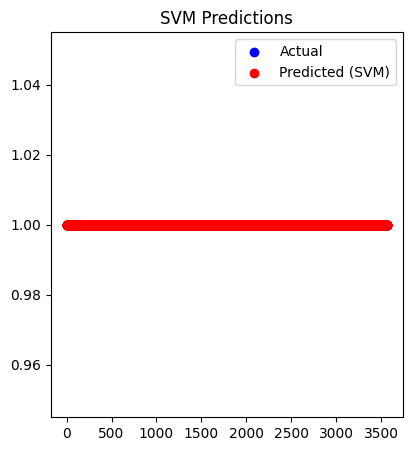

In [39]:
# Plotting SVM predictions
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(range(len(y_test)), y_test, label='Actual', color='blue')
plt.scatter(range(len(svm_predictions)), svm_predictions, label='Predicted (SVM)', color='red')
plt.title('SVM Predictions')
plt.legend()

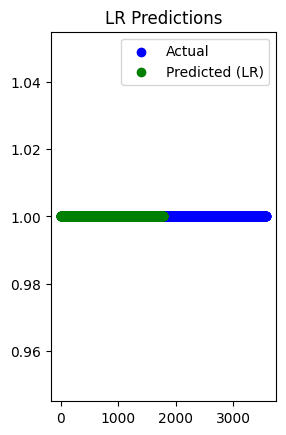

In [40]:
# Plotting LR predictions
plt.subplot(1, 2, 2)
plt.scatter(range(len(y_test)), y_test, label='Actual', color='blue')
plt.scatter(range(len(lr_predictions)), lr_predictions, label='Predicted (LR)', color='green')
plt.title('LR Predictions')
plt.legend()
plt.show()

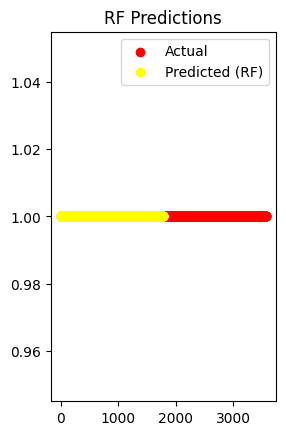

In [41]:
# Plotting RF predictions
plt.subplot(1, 2, 2)
plt.scatter(range(len(y_test)), y_test, label='Actual', color='red')
plt.scatter(range(len(rf_predictions)), rf_predictions, label='Predicted (RF)', color='yellow')
plt.title('RF Predictions')
plt.legend()
plt.show()

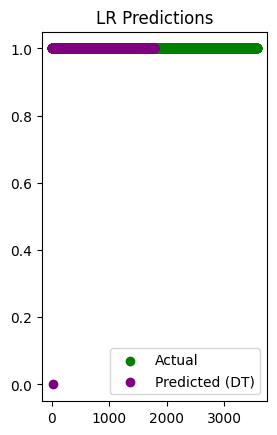

In [42]:
# Plotting DT predictions
plt.subplot(1, 2, 2)
plt.scatter(range(len(y_test)), y_test, label='Actual', color='green')
plt.scatter(range(len(dt_predictions)), dt_predictions, label='Predicted (DT)', color='purple')
plt.title('LR Predictions')
plt.legend()
plt.show()

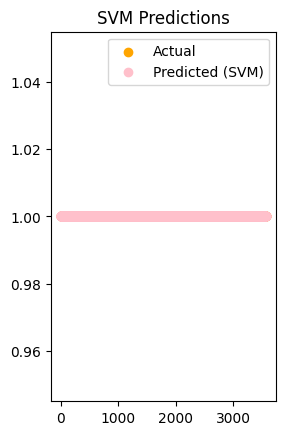

In [43]:
# Plotting SVM predictions
plt.subplot(1, 2, 2)
plt.scatter(range(len(y_test)), y_test, label='Actual', color='orange')
plt.scatter(range(len(svm_predictions)), svm_predictions, label='Predicted (SVM)', color='pink')
plt.title('SVM Predictions')
plt.legend()
plt.show()

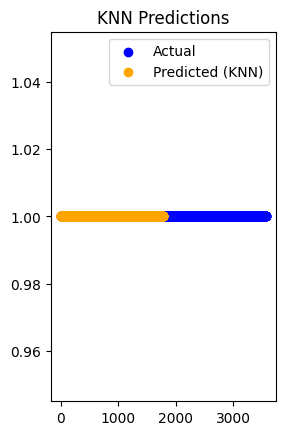

In [44]:
# Plotting KNN predictions
plt.subplot(1, 2, 2)
plt.scatter(range(len(y_test)), y_test, label='Actual', color='blue')
plt.scatter(range(len(knn_predictions)), knn_predictions, label='Predicted (KNN)', color='orange')
plt.title('KNN Predictions')
plt.legend()
plt.show()

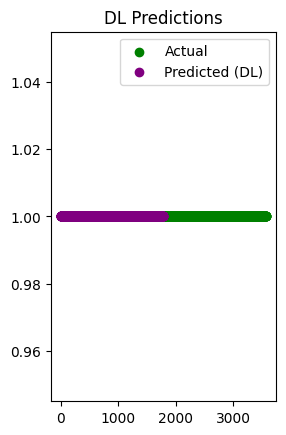

In [45]:
# Plotting DL predictions
plt.subplot(1, 2, 2)
plt.scatter(range(len(y_test)), y_test, label='Actual', color='green')
plt.scatter(range(len(dl_predictions)), dl_predictions, label='Predicted (DL)', color='purple')
plt.title('DL Predictions')
plt.legend()
plt.show()